In [7]:
import operator
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from  pathlib import Path
import projet3


In [8]:
sns.set(color_codes=True)

In [9]:
result_folder = Path(projet3.__file__).with_name("results")
data_src_folder = Path(projet3.__file__).with_name("data")
data = pd.read_csv(result_folder.joinpath("subset_data.csv"))


/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
def make_filter(data_, *columns_, inv=True):
    if inv:
        op = operator.inv
    else:
        op = lambda x:x 
    f = op(data_[columns_[0]].isnull())
    for c in columns_[1:]:
        f &= op( data_[c].isnull() )
    return f

In [11]:
columns = list(data.columns)

In [12]:
# les colonnes retenues
columns = ['fat_100g', 'saturated-fat_100g', 'sugars_100g', 'carbohydrates_100g', 'proteins_100g','salt_100g',  'sodium_100g']

# les autres colonnes interessantes
candidates = ['calcium_100g',
 'cholesterol_100g',
 'trans-fat_100g',
 'iron_100g',
 'vitamin-c_100g',
 'vitamin-a_100g']

In [13]:
# on complete les colonnes calculé 
all_columns = candidates + columns
candidate_data = pd.read_csv(data_src_folder / "en.openfoodfacts.org.products.csv", sep="\t")
complete_data = candidate_data[make_filter(candidate_data, *all_columns)]

#complete_data[['calcium_100g'],['cholesterol_100g'],['trans-fat_100g'],['iron_100g'],['vitamin-c_100g'],['vitamin-a_100g'],['fat_100g'],['saturated-fat_100g'],['sugars_100g'],['carbohydrates_100g'],['proteins_100g'],['salt_100g'],['sodium_100g']].info

/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,24,25,26,28,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127292 entries, 42 to 1008968
Columns: 175 entries, code to carnitine_100g
dtypes: float64(117), int64(2), object(56)
memory usage: 170.9+ MB


In [15]:
complete_data[all_columns].head(10)

,calcium_100g,cholesterol_100g,trans-fat_100g,iron_100g,vitamin-c_100g,vitamin-a_100g,fat_100g,saturated-fat_100g,sugars_100g,carbohydrates_100g,proteins_100g,salt_100g,sodium_100g
42,0.000,0.018,0.0,0.00129,0.0214,0.000000,28.57,28.57,14.29,64.29,3.57,0.00000,0.000000
43,0.071,0.000,0.0,0.00129,0.0000,0.000000,17.86,0.00,17.86,60.71,17.86,0.63500,0.254000
175,0.036,0.000,0.0,0.00262,0.0000,0.000000,10.91,0.91,25.45,74.55,9.09,0.25400,0.101600
178,0.071,0.000,0.0,0.00514,0.0000,0.000000,42.86,7.14,14.29,25.00,25.00,0.54356,0.217424
246,0.000,0.000,0.0,0.00000,0.0000,0.000000,0.00,0.00,66.67,83.33,0.00,0.00000,0.000000
248,0.050,0.000,0.0,0.00360,0.0000,0.001125,0.00,0.00,52.50,62.50,2.50,0.00000,0.000000
249,0.000,0.018,0.0,0.00129,0.0214,0.000000,28.57,28.57,14.29,64.29,3.57,0.00000,0.000000
250,0.073,0.000,0.0,0.00262,0.0000,0.000000,14.55,2.73,21.82,60.00,9.09,0.11430,0.045720
251,0.100,0.000,0.0,0.00090,0.0000,0.000750,2.50,0.00,65.00,87.50,2.50,1.96850,0.787400
252,0.050,0.012,0.0,0.00180,0.0000,0.000075,22.50,12.50,42.50,70.00,5.00,1.01600,0.406400


In [16]:
# on save la donnes pour utilsation ultérieure
complete_data.to_csv(result_folder / "candidate_full.csv")

In [17]:
# regarsons les données pour lesquelles toutes les colonnes sont vides 
void_data = candidate_data[make_filter(candidate_data, *all_columns, inv=False,)]

In [18]:
void_data.head(100)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000208,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1544207680,2018-12-07T18:34:40Z,1544207683,2018-12-07T18:34:43Z,Pistou d'ail des ours,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0000000000284,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1547120245,2019-01-10T11:37:25Z,1563551052,2019-07-19T15:44:12Z,Pain maïs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,0000020317744,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1543595133,2018-11-30T16:25:33Z,1543595135,2018-11-30T16:25:35Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460,0000020317751,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1543595080,2018-11-30T16:24:40Z,1543595093,2018-11-30T16:24:53Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461,0000020364373,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1393970573,2014-03-04T22:02:53Z,1393970733,2014-03-04T22:05:33Z,Zumo de Piña,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,00000208,http://world-en.openfoodfacts.org/product/0000...,roboto-app,1552299440,2019-03-11T10:17:20Z,1552299440,2019-03-11T10:17:20Z,NaN,NaN,180 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'\n\nfor i, s in enumerate(columns):\n    plt.sca(ax[i])\n    print(f"Analyse de {s}")\n    #%%\n    data[s].describe()\n    \n    #%%\n    data[s].dropna(inplace=True)\n    data_s = data[[s]]\n    \n    #%%\n    med = data[s].median()\n    mean = data[s].mean()\n    h_limit = 4 * med \n    #l_limit = data[\'sodium_100g\'].mean() - 3 * data[\'sodium_100g\'].std()\n    #%%\n    data_s = data_s[ (data_s[s] <= h_limit)]\n    #%%\n    data_s.describe()\n    #%%\n    sns.distplot(data_s[s], kde=True, norm_hist=True)\n    plt.xlim(0, h_limit)\n    plt.legend(s)\n'

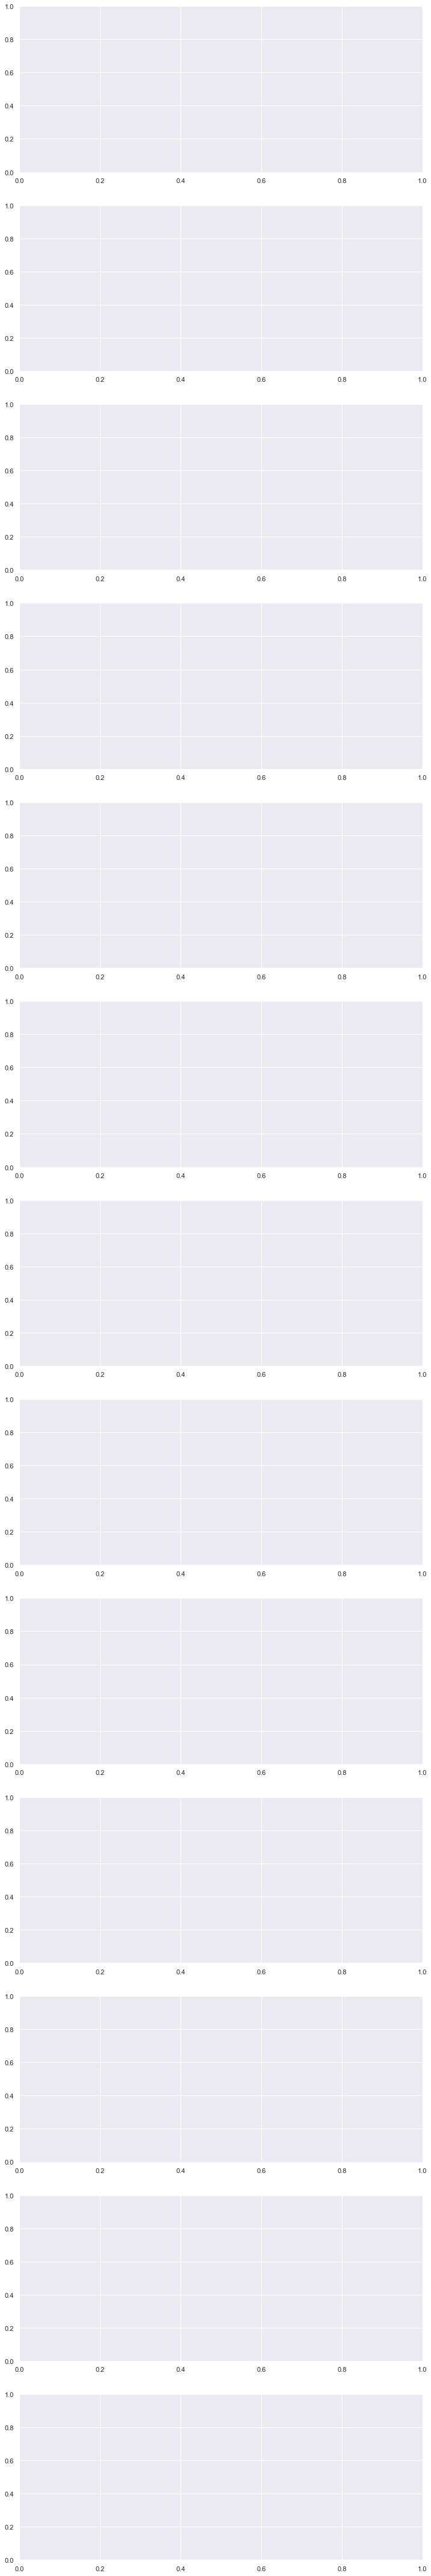

In [19]:
columns  = all_columns
n = len(columns)
fig, ax = plt.subplots(n, 1, figsize=(12,n*6))

"""

for i, s in enumerate(columns):
    plt.sca(ax[i])
    print(f"Analyse de {s}")
    #%%
    data[s].describe()
    
    #%%
    data[s].dropna(inplace=True)
    data_s = data[[s]]
    
    #%%
    med = data[s].median()
    mean = data[s].mean()
    h_limit = 4 * med 
    #l_limit = data['sodium_100g'].mean() - 3 * data['sodium_100g'].std()
    #%%
    data_s = data_s[ (data_s[s] <= h_limit)]
    #%%
    data_s.describe()
    #%%
    sns.distplot(data_s[s], kde=True, norm_hist=True)
    plt.xlim(0, h_limit)
    plt.legend(s)
"""

In [20]:
# visualisation via radar chart d'une entrée
def plot_radar(index):
    labels = columns
    fig = plt.figure()
    stats_ = complete_data.loc[index, labels].values
    
    angles=np.linspace(0, 2*np.pi, len(columns), endpoint=False)
    
    stats = np.concatenate((stats_,[stats_[0]]))
    angles = np.concatenate((angles,[angles[0]]))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    name = complete_data.loc[index, "product_name"]
    ax.set_title(name)
    ax.grid(True)

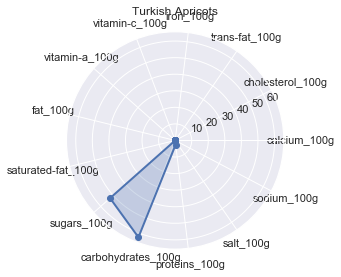

In [21]:
plot_radar(248)

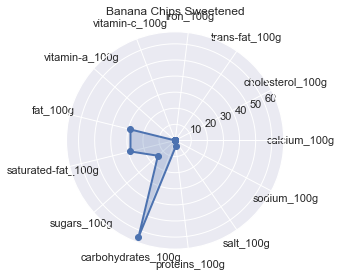

In [22]:
plot_radar(249)